In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
palette = "Dark2"
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

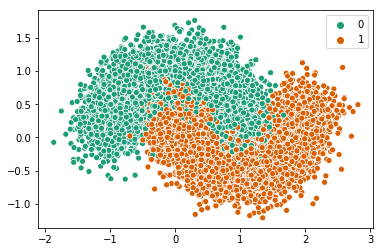

In [2]:
noisy_moons = make_moons(n_samples=10000, noise=.25, random_state=42)

sns.scatterplot(x=noisy_moons[0][:, 0],
                y=noisy_moons[0][:, 1],
                hue=noisy_moons[1],
                palette=palette)

In [3]:
# Load and split the data
X_train, X_test, y_train, y_test = train_test_split(noisy_moons[0], noisy_moons[1], test_size=0.3, random_state=42)

In [4]:
# Build the model
rf_moon = RandomForestClassifier(random_state=42)
rf_moon.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [5]:
from modeleval import BinaryEvaluator

In [6]:
# Initialize an evaluator
eva = BinaryEvaluator()

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.9333
The recall for 1 is 0.9213
The precision for 1 is 0.9406
The recall for 0 is 0.9448
The precision for 0 is 0.9267
The F1-score is 0.9308
The ROC-AUC is 0.9721

---Confusion Matrix---
Predicted     0     1   All
True                       
0          1454    85  1539
1           115  1346  1461
All        1569  1431  3000


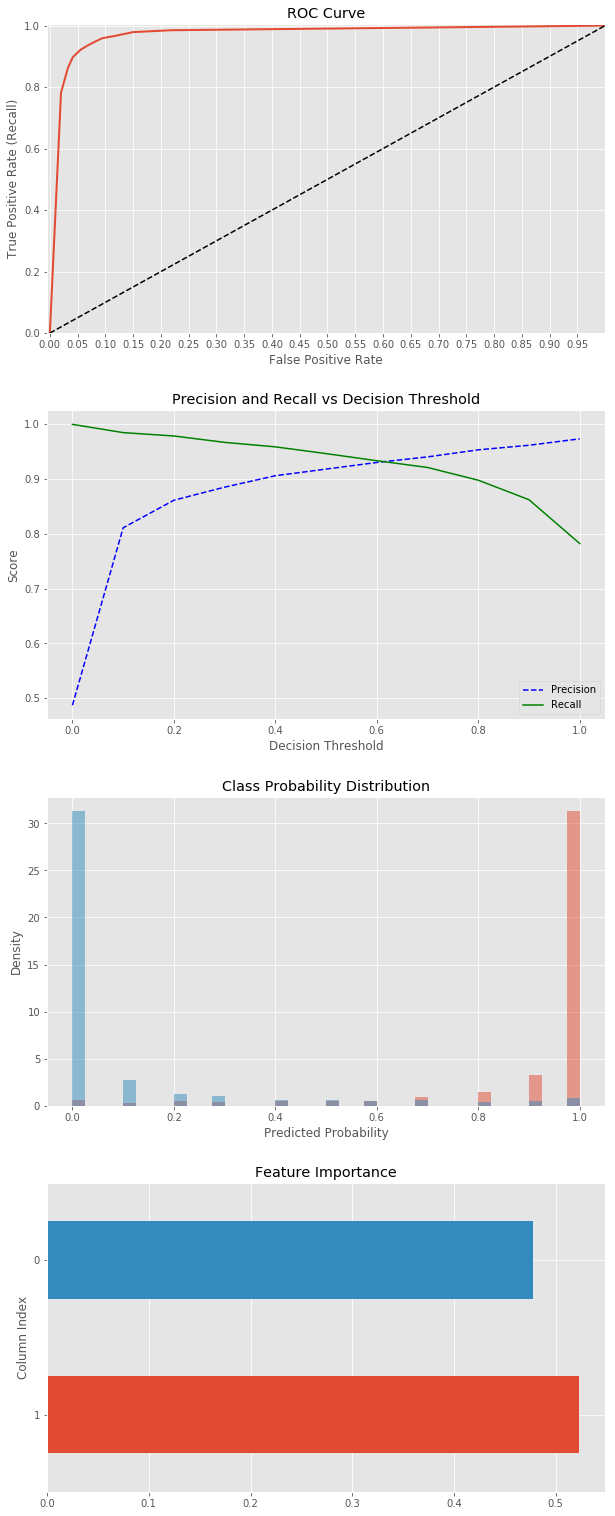

In [7]:
# Evaluate the model
eva.evaluate(rf_moon, X_test, y_test, threshold=0.6, save=True, save_folder= "result/")

In [12]:
# Show metrics result on a given thresholds grid
eva.ThresGridSearch(rf_moon, X_test, y_test, thres_list=[0.1,0.3,0.5,0.7],
                    objective=["accuracy"])

,Threshold,accuracy,recall_1,precision_1,recall_0,precision_0,f1,roc_auc
0,0.1,0.913000,0.978782,0.861446,0.850552,0.976866,0.916373,0.972061
3,0.7,0.929000,0.898015,0.953488,0.958415,0.908251,0.924921,0.972061
1,0.3,0.931667,0.958932,0.906210,0.905783,0.958735,0.931826,0.972061
2,0.5,0.933667,0.933607,0.930423,0.933723,0.936767,0.932012,0.972061


In [13]:
# Build another model
from sklearn.linear_model import LogisticRegression

In [14]:
logi_moon = LogisticRegression(random_state=42)
logi_moon.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.8677
The recall for 1 is 0.8316
The precision for 1 is 0.8895
The recall for 0 is 0.9019
The precision for 0 is 0.8494
The F1-score is 0.8596
The ROC-AUC is 0.9460

---Confusion Matrix---
Predicted     0     1   All
True                       
0          1388   151  1539
1           246  1215  1461
All        1634  1366  3000


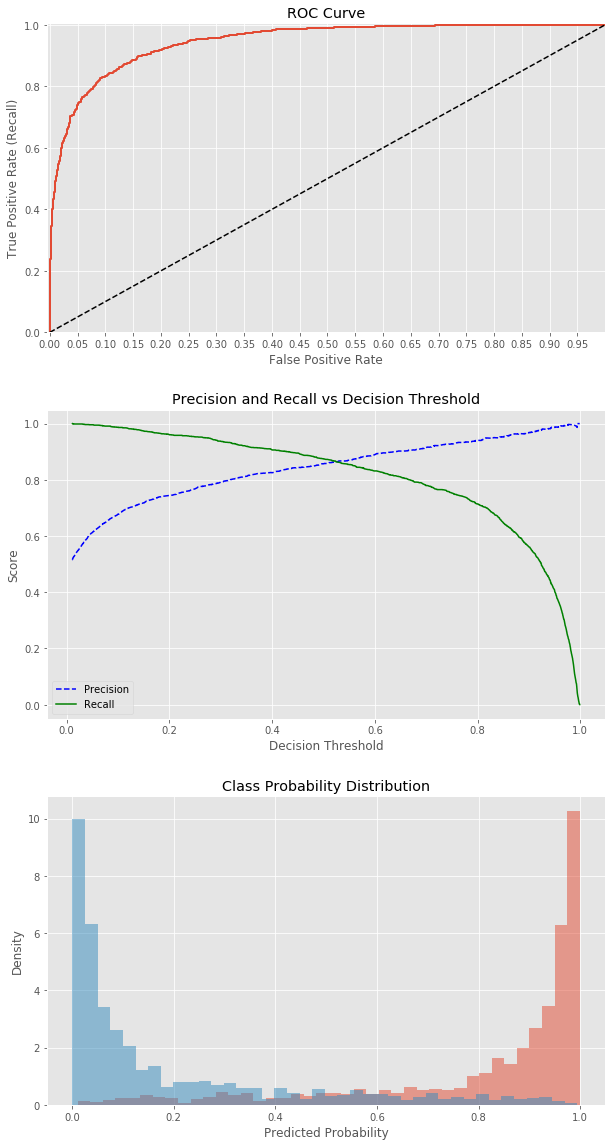

In [15]:
eva.evaluate(logi_moon, X_test, y_test, threshold=0.6)

In [16]:
# the best model among 2 with given metric
best_model_acc = eva.find_best_model([rf_moon, logi_moon], X_test, y_test, objective="accuracy", threshold=0.6)

The model with maximum accuracy (0.9333333333333333) is the 1 th model
